In [1]:
import cv2
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import winsound

In [2]:
# loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\自學成果\deep_learning\mask\mask_data2',
    validation_split=0.9,
    subset= "validation",
    seed=42,
    image_size= (200, 200),
    batch_size=40
)

Found 1345 files belonging to 2 classes.
Using 1210 files for validation.


In [3]:
new_model = tf.keras.models.load_model('maskDetector_2896file_n.h5')

# Show the model architecture
new_model.summary()
loss, acc = new_model.evaluate(testing_ds)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0

In [4]:
class_names = testing_ds.class_names

['with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'with_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'with_mask', 'without_mask', 'without_mask']


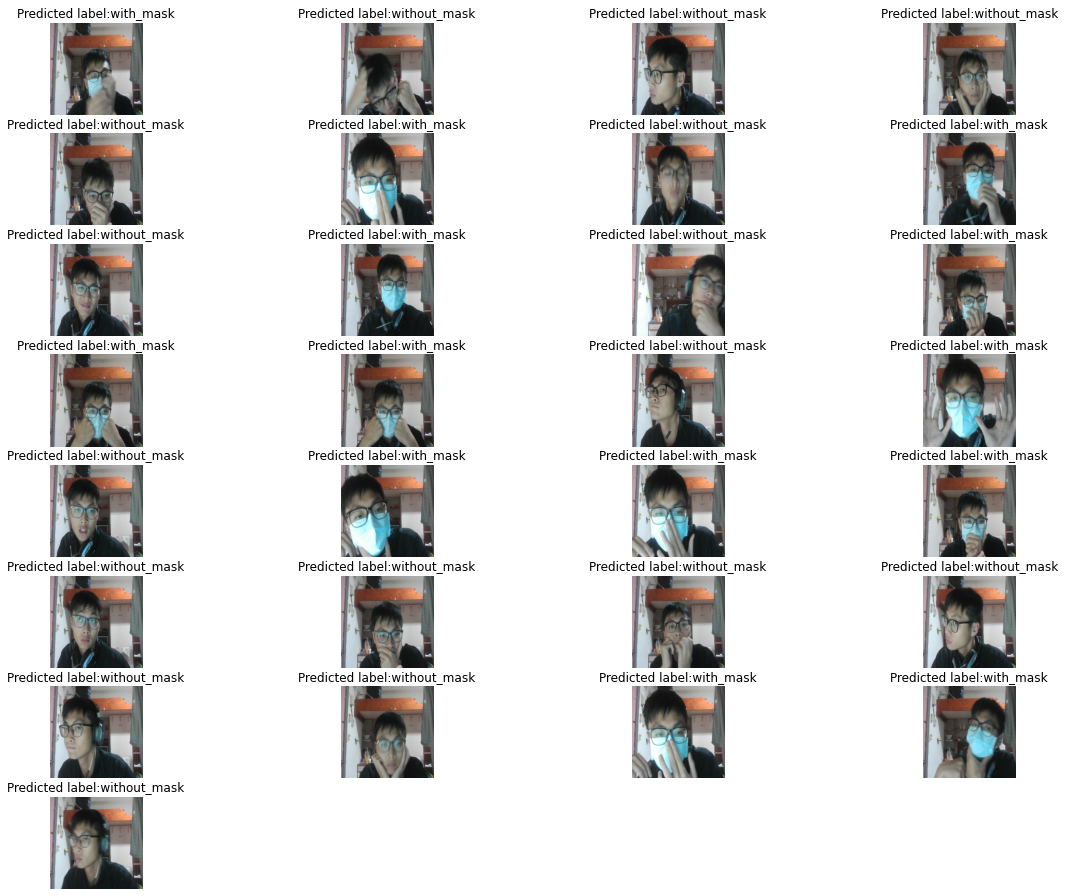

In [5]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(1):
    predictions = new_model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(29):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)
print(predlabel)

In [6]:
def video_capture(is_2_write=False,save_path=None):
    
    cap = cv2.VideoCapture(0)
    
#   count = 1034
    while (cap.isOpened()):


        # get image
        ret, img = cap.read()
        
        if ret is True:
            # image processing
            
              # gather_data #
#             count += 1
#             cv2.imwrite(f'new_mask{count}.jpg',img)
                
            # save_file #
            cv2.imwrite(f'new_mask.jpg',img)    
            
            # predict #
            x = keras.preprocessing.image.load_img(f'new_mask.jpg',target_size = (200,200)) 
            x2 = keras.preprocessing.image.img_to_array(x)
            x2 = tf.expand_dims(x2, 0)     
            predlabel2 = []
            predictions2 = new_model.predict(x2)
            predlabel2.append(class_names[np.argmax(predictions2)])
                

            #主板蜂鳴器 (freq, duration)
            if predlabel2[0] == 'without_mask':
                winsound.Beep(2222,100) 
                winsound.MessageBeep()            

            # image display
            cv2.imshow("demo by JohnnyAI", img)
 
            # 'q' key pressed
            if cv2.waitKey(1) & 0xFF == ord('q')  :
                break
        else:
            print("get image failed")
            break

    #----release
    cap.release()
    cv2.destroyAllWindows()
    print(predlabel2)

In [9]:
#save_path = r"C:\Users\張智宇\OpenCV\demo.mp4"
video_capture()

['without_mask']
